# Effekten av vindparker til sjøs - Sørvest F 
### Kjersti Stangeland - Sommer 2025 - Meteorologisk Institutt

#### Prosjektet
Et scenario med norske havvindparker er utviklet i samarbeid med NVE. Perioden 2/2-2022 til 30/6-2022 er simulert med MEPS, WaveWatch III, og Norkyst v3. Det er to varianter av simuleringene:
* Kontrollkjøring basert på dagens situasjon uten norske havindparker
* Eskperiment med simulerte havvindparker

I eksperimentene er det kun MEPS som har en direkte parameterisering av turbineffekter, slik at påvirkningen på bølgene og havsirkulasjonen er indirekte gjennom endrede overflateflukser.

__Detaljer om havvind-parkene__
* Turbinhøyde 165 m
* Radius 143 m
* 2.5 km mellom turbinene

__Sørvest F (trolig utdatert info)__
* 4 x 64 turbiner
* Total kapasitet på 5632 MW


In [3]:
import xarray as xr
import xroms
import gsw
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from pre_process import *

In [ ]:
""" # Opening experiments with turbines
exp_02_avg, xgrid_02 = open_experiment(turb=True, exp_number=2, num_of_days=27)
exp_03_avg, xgrid_03 = open_experiment(turb=True, exp_number=3, num_of_days=31)
exp_04_avg, xgrid_04 = open_experiment(turb=True, exp_number=4, num_of_days=30)
exp_05_avg, xgrid_05 = open_experiment(turb=True, exp_number=5, num_of_days=31)
exp_06_avg, xgrid_06 = open_experiment(turb=True, exp_number=6, num_of_days=30) """

In [ ]:
""" # Opening reference data without turbines
ref_02_avg, xgrid_02 = open_experiment(turb=False, exp_number=2, num_of_days=27)
ref_03_avg, xgrid_03 = open_experiment(turb=False, exp_number=3, num_of_days=31)
ref_04_avg, xgrid_04 = open_experiment(turb=False, exp_number=4, num_of_days=30)
ref_05_avg, xgrid_05 = open_experiment(turb=False, exp_number=5, num_of_days=31)
ref_06_avg, xgrid_06 = open_experiment(turb=False, exp_number=6, num_of_days=30) """

In [10]:
test = xroms.open_netcdf('/lustre/storeB/project/nwp/havvind/hav/results/experiment/EXP-06/norkyst_avg_0001.nc')
test, xgrid = xroms.roms_dataset(test, include_cell_volume=True)

In [ ]:
# Reading in the turbine coordinates
sorvest_F = get_turbine_coords('/lustre/storeB/project/nwp/havvind/turbine_coordinates/windfarms_Sorvest_F.txt')

Text(0.5, 0.98, 'Sørvest F location')

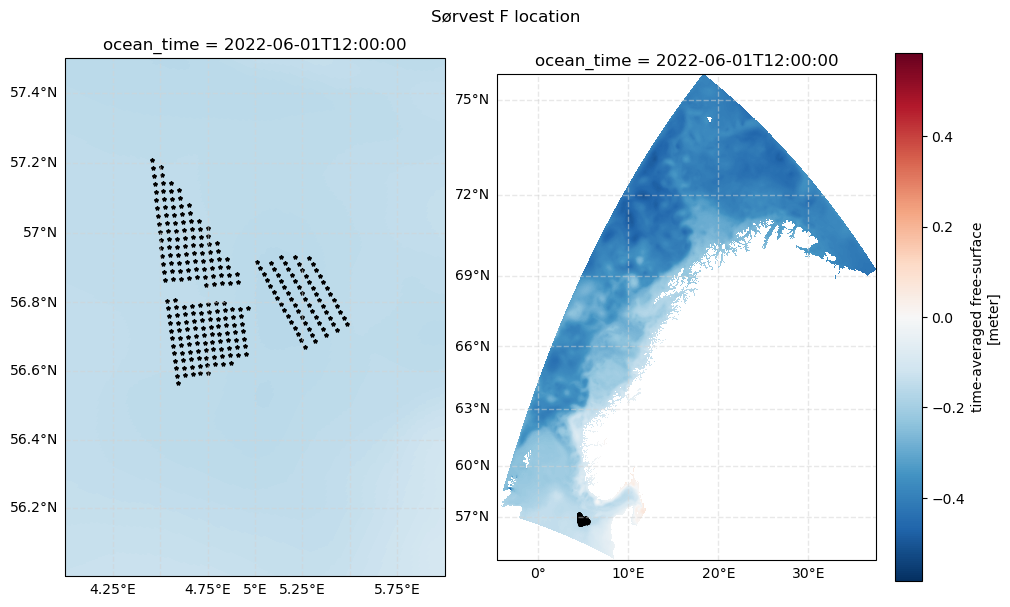

In [17]:
proj = ccrs.Mercator()
fig, ax = plt.subplots(1,2, figsize = (10, 6), subplot_kw={'projection':proj}, constrained_layout=True)

ax[0].set_extent([4, 6, 56, 57.5], crs=ccrs.PlateCarree())

test.zeta.isel(ocean_time=0).plot(ax = ax[0], x='lon_rho', y='lat_rho', transform=ccrs.PlateCarree(), add_colorbar=False)
test.zeta.isel(ocean_time=0).plot(ax = ax[1], x='lon_rho', y='lat_rho', transform=ccrs.PlateCarree())

for axs in ax.flatten():
    for i in range(len(sorvest_F.coordinates)):
        axs.plot(sorvest_F.coordinates[i][0], sorvest_F.coordinates[i][1], transform = ccrs.PlateCarree(), color = 'black', marker ='*', markersize=3) 
    
    gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='lightgray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Disable top labels
    gl.right_labels = False  # Disable right labels
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

fig.suptitle('Sørvest F location')

### Beregning av midlere intern Rossbyradie

For videre utregninger er det fint å avgrense modellområdet. Ved å bruke den interne Rossbyradien, kan vi med trygghet avgrense området slik at vi er sikre på at den relevante dynamikken kommer med. I vårt tilfelle er vi interesert i å avgrense et området av skala 1-2 deformasjonsradier slik at dynamikken i området er dominert av interne barokline instabiliterer. (???)
Rossbyradien sier noe om deformasjonslengden av bølger. Det vil si, en lengdeskala hvor jordens rotasjon påvirker strømningene og man har geostrofisk balanse.

Sperrevik et al. (2017) beregner den interne Rossbyradien på følgende måte:
$$R_1 = \frac{c_1}{\mid f \mid}$$
hvor $f$ er det lokale Coriolis parameterte og $c_1$ er fasehastigheten til første modus av baroklinisk intern gravitasjonsbølge. Fasehastigheten kan beregnes ved å løse et egenverdi problem, men Chelton et al. (1998) tilbyr en approksimasjon kalt WKB løsning:
$$R_1 \approx R_1^{WKB} = \frac{1}{\mid f \mid \pi}\int_{-H}^{0}N(z) dz$$

Her er $H$ den lokale vanndybden og $N$ oppdriftsfrekvens.

In [14]:
R_test = rossby_radius(test.f, test.rho, test.z_w, xgrid)

/home/kjsta7412/.local/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


/modules/rhel8/conda/install/envs/production-10-2022/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
/home/kjsta7412/.local/lib/python3.9/site-packages/numba/np/ufunc/gufunc.py:252: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return self.ufunc(*args, **kwargs)


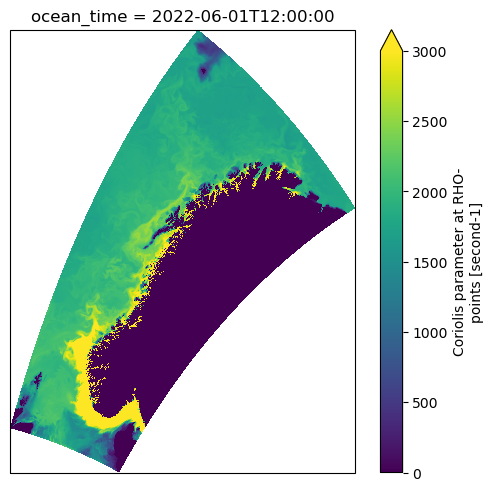

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection':proj}, constrained_layout=True)

R_test.plot(ax = ax, x='lon_rho', y='lat_rho', transform=ccrs.PlateCarree(), vmin=0, vmax=3000)